In [2]:
import polars as pl
import pandas as pd
# from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Read 5GB  CSV file

In [3]:
df_path = r'F:\DataSpell\Polars_library_learn\Youtube Lessons\Polars Tutorial\data\2019-Nov.csv'

In [4]:
%%time
df = pl.read_csv(df_path)

CPU times: total: 4.38 s
Wall time: 17.6 s


# Basic operations

In [5]:
df.shape

(67501979, 9)

In [6]:
# df.head().to_pandas()

In [7]:
pl.DataFrame(df.dtypes)

column_0
object
String
String
Int64
Int64
String
String
Float64
Int64
String


In [8]:
df.describe()

statistic,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,str,f64,f64,str,str,f64,f64,str
"""count""","""67501979""","""67501979""",6.7501979e7,6.7501979e7,"""45603808""","""58283744""",6.7501979e7,6.7501979e7,"""67501969"""
"""null_count""","""0""","""0""",0.0,0.0,"""21898171""","""9218235""",0.0,0.0,"""10"""
"""mean""",null,null,1.2514e7,2.0579e18,null,null,292.459317,5.3864e8,null
"""std""",null,null,1.7257e7,2.0125e16,null,null,355.6745,2.2885e7,null
"""min""","""2019-11-01 00:00:00 UTC""","""cart""",1.000365e6,2.0530e18,"""accessories.bag""","""a-case""",0.0,1.0300217e7,"""0000007c-adbf-4ed7-af17-d1fef9…"
"""25%""",null,null,1.305977e6,2.0530e18,null,null,69.24,5.16476241e8,null
"""50%""",null,null,5.100568e6,2.0530e18,null,null,165.77,5.35057264e8,null
"""75%""",null,null,1.7300752e7,2.0530e18,null,null,360.34,5.61079379e8,null
"""max""","""2019-11-30 23:59:59 UTC""","""view""",1.00028554e8,2.1877e18,"""stationery.cartrige""","""zyxel""",2574.07,5.79969851e8,"""fffffde2-4522-4b44-8a32-510c55…"


# Selecting and Filtering Data

## 1. Indexing with [ works but is an anti-pattern in polars
There is no df.loc or df.iloc in polars

In [9]:
df[0,:]

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:00:00 UTC""","""view""",1003461,2053013555631882655,"""electronics.smartphone""","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-49df-b1a8-ba5943…"


In [10]:
df.columns

['event_time',
 'event_type',
 'product_id',
 'category_id',
 'category_code',
 'brand',
 'price',
 'user_id',
 'user_session']

In [11]:
df[['event_time', 'price']].head()

event_time,price
str,f64
"""2019-11-01 00:00:00 UTC""",489.07
"""2019-11-01 00:00:00 UTC""",293.65
"""2019-11-01 00:00:01 UTC""",28.31
"""2019-11-01 00:00:01 UTC""",712.87
"""2019-11-01 00:00:01 UTC""",183.27


In [12]:
df.filter(pl.col('price')> 1000)

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:00:27 UTC""","""view""",1004237,2053013555631882655,"""electronics.smartphone""","""apple""",1091.33,565404816,"""d9cf0ac4-c3ec-4e1f-83aa-326b1e…"
"""2019-11-01 00:00:40 UTC""","""view""",1005116,2053013555631882655,"""electronics.smartphone""","""apple""",1013.86,532647354,"""d2d3d2c6-631d-489e-9fb5-06f340…"
"""2019-11-01 00:00:41 UTC""","""view""",1004241,2053013555631882655,"""electronics.smartphone""","""apple""",1173.6,565404816,"""d9cf0ac4-c3ec-4e1f-83aa-326b1e…"
"""2019-11-01 00:00:41 UTC""","""view""",1004237,2053013555631882655,"""electronics.smartphone""","""apple""",1091.33,519277091,"""62fadce6-aa4a-4dde-92fc-c04c22…"
"""2019-11-01 00:00:51 UTC""","""view""",1307012,2053013558920217191,"""computers.notebook""","""apple""",2342.15,530857208,"""c69f9c63-7098-426c-97d9-8cb94a…"
…,…,…,…,…,…,…,…,…
"""2019-11-30 23:59:17 UTC""","""view""",1005124,2053013555631882655,"""electronics.smartphone""","""apple""",1436.56,571072384,"""8f414ee3-5bf5-48ce-a57c-f19a9b…"
"""2019-11-30 23:59:29 UTC""","""view""",1005105,2053013555631882655,"""electronics.smartphone""","""apple""",1302.48,556695836,"""ca5eefc5-11f9-450c-91ed-380285…"
"""2019-11-30 23:59:38 UTC""","""view""",1005105,2053013555631882655,"""electronics.smartphone""","""apple""",1302.48,561181104,"""b2c61552-576c-4532-8d1e-ad2a0a…"


## 2. Select data with idiomatic polars

In [13]:
df.sample(5)

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-26 12:53:42 UTC""","""view""",12400438,2053013556252639687,"""construction.tools.drill""","""makita""",622.8,535057247,"""1c6b3456-334d-eb5e-f2db-02bd99…"
"""2019-11-29 09:06:57 UTC""","""purchase""",21409356,2053013561579406073,"""electronics.clocks""",null,18.02,578802815,"""cd8e37d5-c15a-4cb4-9c7d-63783f…"
"""2019-11-08 09:51:27 UTC""","""view""",1801631,2053013554415534427,"""electronics.video.tv""","""artel""",334.11,558361105,"""1a4fae89-8edd-43ff-86cc-f94225…"
"""2019-11-20 13:10:58 UTC""","""view""",6301705,2053013554834964853,"""appliances.kitchen.kettle""","""scarlett""",15.86,567683792,"""0136f813-d539-4071-a9a6-cc27f7…"
"""2019-11-26 15:58:10 UTC""","""view""",10400610,2053013553257906447,"""kids.toys""","""maisto""",28.29,544660034,"""952a4f1e-6597-4c35-b2ad-9209fa…"


In [14]:
df.select(['brand', 'price'])

brand,price
str,f64
"""xiaomi""",489.07
"""janome""",293.65
"""creed""",28.31
"""lg""",712.87
"""xiaomi""",183.27
…,…
null,277.74
"""baden""",62.81
"""samsung""",167.03


In [15]:
df.with_columns([
    (pl.col('price') * 100).alias('price_100'),
])

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,price_100
str,str,i64,i64,str,str,f64,i64,str,f64
"""2019-11-01 00:00:00 UTC""","""view""",1003461,2053013555631882655,"""electronics.smartphone""","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-49df-b1a8-ba5943…",48907.0
"""2019-11-01 00:00:00 UTC""","""view""",5000088,2053013566100866035,"""appliances.sewing_machine""","""janome""",293.65,530496790,"""8e5f4f83-366c-4f70-860e-ca7417…",29365.0
"""2019-11-01 00:00:01 UTC""","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-477b-9bd2-6a6e8f…",2831.0
"""2019-11-01 00:00:01 UTC""","""view""",3601530,2053013563810775923,"""appliances.kitchen.washer""","""lg""",712.87,518085591,"""3bfb58cd-7892-48cc-8020-2f17e6…",71287.0
"""2019-11-01 00:00:01 UTC""","""view""",1004775,2053013555631882655,"""electronics.smartphone""","""xiaomi""",183.27,558856683,"""313628f1-68b8-460d-84f6-cec7a8…",18327.0
…,…,…,…,…,…,…,…,…,…
"""2019-11-30 23:59:58 UTC""","""view""",15700137,2053013559733912211,null,null,277.74,532714000,"""02b4131c-0112-4231-aafa-ceaa08…",27774.0
"""2019-11-30 23:59:58 UTC""","""view""",28719425,2053013565639492569,"""apparel.shoes""","""baden""",62.81,545223467,"""734c5eef-0742-4f8b-9d22-48f75b…",6281.0
"""2019-11-30 23:59:59 UTC""","""view""",1004833,2053013555631882655,"""electronics.smartphone""","""samsung""",167.03,557794415,"""6fecf566-ebb0-4e70-a243-cdc13c…",16703.0


In [16]:
df.filter(pl.col('price') > 1000)

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:00:27 UTC""","""view""",1004237,2053013555631882655,"""electronics.smartphone""","""apple""",1091.33,565404816,"""d9cf0ac4-c3ec-4e1f-83aa-326b1e…"
"""2019-11-01 00:00:40 UTC""","""view""",1005116,2053013555631882655,"""electronics.smartphone""","""apple""",1013.86,532647354,"""d2d3d2c6-631d-489e-9fb5-06f340…"
"""2019-11-01 00:00:41 UTC""","""view""",1004241,2053013555631882655,"""electronics.smartphone""","""apple""",1173.6,565404816,"""d9cf0ac4-c3ec-4e1f-83aa-326b1e…"
"""2019-11-01 00:00:41 UTC""","""view""",1004237,2053013555631882655,"""electronics.smartphone""","""apple""",1091.33,519277091,"""62fadce6-aa4a-4dde-92fc-c04c22…"
"""2019-11-01 00:00:51 UTC""","""view""",1307012,2053013558920217191,"""computers.notebook""","""apple""",2342.15,530857208,"""c69f9c63-7098-426c-97d9-8cb94a…"
…,…,…,…,…,…,…,…,…
"""2019-11-30 23:59:17 UTC""","""view""",1005124,2053013555631882655,"""electronics.smartphone""","""apple""",1436.56,571072384,"""8f414ee3-5bf5-48ce-a57c-f19a9b…"
"""2019-11-30 23:59:29 UTC""","""view""",1005105,2053013555631882655,"""electronics.smartphone""","""apple""",1302.48,556695836,"""ca5eefc5-11f9-450c-91ed-380285…"
"""2019-11-30 23:59:38 UTC""","""view""",1005105,2053013555631882655,"""electronics.smartphone""","""apple""",1302.48,561181104,"""b2c61552-576c-4532-8d1e-ad2a0a…"


In [17]:
df.filter(pl.col('brand').is_in(['apple', 'samsung', 'motorola']))

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:00:02 UTC""","""view""",1004258,2053013555631882655,"""electronics.smartphone""","""apple""",732.07,532647354,"""d2d3d2c6-631d-489e-9fb5-06f340…"
"""2019-11-01 00:00:05 UTC""","""view""",4600658,2053013563944993659,"""appliances.kitchen.dishwasher""","""samsung""",411.83,526595547,"""aab33a9a-29c3-4d50-84c1-8a2bc9…"
"""2019-11-01 00:00:10 UTC""","""view""",1005115,2053013555631882655,"""electronics.smartphone""","""apple""",949.47,562079864,"""0fe64462-83eb-4131-ab00-8e764d…"
"""2019-11-01 00:00:14 UTC""","""view""",1002544,2053013555631882655,"""electronics.smartphone""","""apple""",458.28,549256216,"""dcbdc6e4-cd49-4ee8-95c5-e85f3c…"
"""2019-11-01 00:00:14 UTC""","""cart""",1005014,2053013555631882655,"""electronics.smartphone""","""samsung""",503.09,533326659,"""6b928be2-2bce-4640-8296-0efdf2…"
…,…,…,…,…,…,…,…,…
"""2019-11-30 23:59:54 UTC""","""view""",1005174,2053013555631882655,"""electronics.smartphone""","""samsung""",591.75,579969525,"""180a7f1f-ed0c-485a-b145-a98071…"
"""2019-11-30 23:59:54 UTC""","""view""",1005118,2053013555631882655,"""electronics.smartphone""","""apple""",925.47,579969045,"""ee246970-62cb-4105-a049-703cda…"
"""2019-11-30 23:59:59 UTC""","""view""",1004833,2053013555631882655,"""electronics.smartphone""","""samsung""",167.03,557794415,"""6fecf566-ebb0-4e70-a243-cdc13c…"


## Computation on the select context

In [18]:
df.select([
    pl.col('product_id').n_unique()
])

product_id
u32
190662


In [19]:
df.select([
    pl.col('price').min().alias('min_price'),
    pl.col('price').max().alias('max_price'),
    pl.col('price').median().alias('median_price'),
    pl.col('price').mean().alias('mean_price'),
    pl.col('price').std().alias('std_price')
])

min_price,max_price,median_price,mean_price,std_price
f64,f64,f64,f64,f64
0.0,2574.07,165.77,292.459317,355.6745


In [20]:
price = df.select([
    pl.col('price')
])

In [21]:
price.sample(1_000)

price
f64
205.67
69.5
1389.74
154.26
99.36
…
185.31
715.33
888.03


array([[<Axes: title={'center': 'price'}>]], dtype=object)

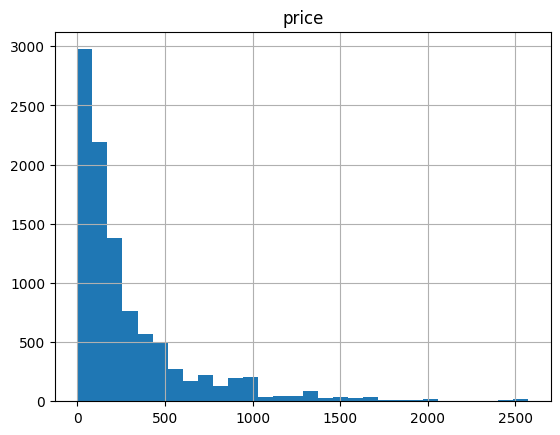

In [23]:
price.sample(10_000).to_pandas().hist(bins=30)

In [24]:
probs = [0, 0.25, 0.5, 0.75, 1]
percentiles = [price.quantile(prob)[0, 0] for prob in probs]
pd.DataFrame(dict(probs=probs, percentiles=percentiles))

,probs,percentiles
0,0.00,0.00
1,0.25,69.24
2,0.50,165.77
3,0.75,360.34
4,1.00,2574.07
